## Table of Content:
    1) Counterplot --> one variable
    2) Barplot --> two variables( x--> categorical , y---> continuous)
    3) Boxplot--> one or two variables
    4) distplot --> one variable
    5) displot---> oe variable
    6) histplot ---> one variable
    7) pairplot--> two variables
    8) heatmap --> two variables
    9) style abd color of the graph

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# how to use in build data set
titanic = sns.load_dataset('tips')
titanic.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [19]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.shape

(244, 7)

In [10]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## counterplot
        this is basically histogram for categorical variable
        this is gives teh count of unique category for categorical variables

#### Q1) whats the count of Male and Female ?

In [26]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

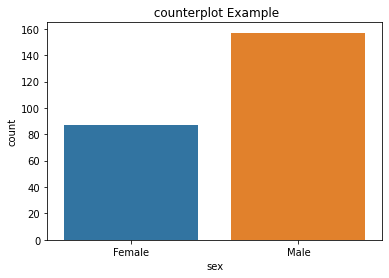

In [8]:
sns.countplot( x = 'sex' , data = tips)
plt.title(' counterplot Example')
plt.show()

##### Q2) Which time zone different Sex prefer?

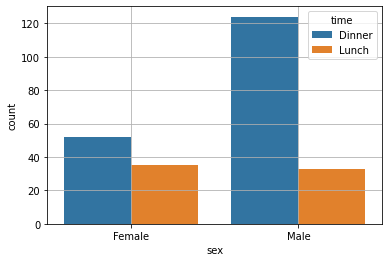

In [15]:
sns.countplot(x  ='sex' , hue = 'time' , data = tips)
plt.grid(True)
plt.show()

## Barplot

        this is bivariant visualization
        x -> categorical and y -> continuous
        by default it return avg in barplot but you can return sum , count, median,

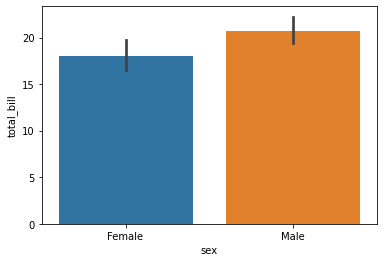

In [17]:
sns.barplot( x  ='sex' , y = 'total_bill' , data = tips) ## by default 
# calculate avaerage
plt.show()

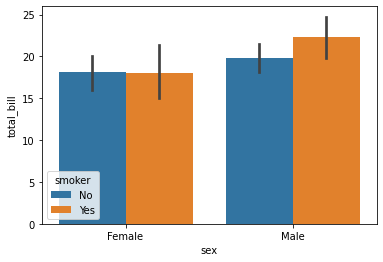

In [23]:
sns.barplot( x  ='sex' , y = 'total_bill' ,hue = 'smoker',
            data = tips) ## by default 
# calculate avaerage
plt.show()

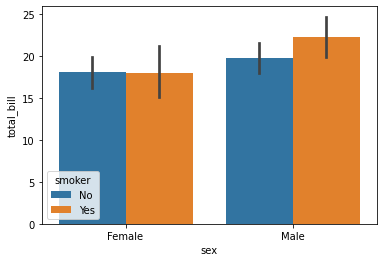

In [22]:
sns.barplot( x  ='sex' , y = 'total_bill' , data = tips ,
            estimator=np.sum)
plt.show()

In [49]:
df = tips.groupby(['sex'])['total_bill'].mean()
type(df)
df

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

In [50]:
df = df.reset_index()
type(df)
df

,sex,total_bill
0,Female,18.056897
1,Male,20.744076


      sex  total_bill
0  Female   18.056897
1    Male   20.744076


<BarContainer object of 2 artists>

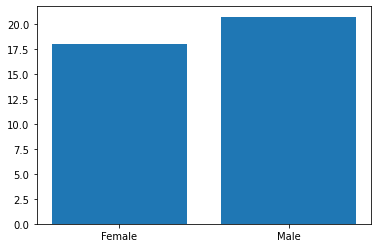

In [40]:
## Groupby using pandas 

df = tips.groupby(['sex'])['total_bill'].mean()
df = df.reset_index()
print(df)
plt.bar(x= 'sex' , height= 'total_bill' , data = df)

In [32]:
tips.groupby(['sex'])['total_bill'].sum()

sex
Female    1570.95
Male      3256.82
Name: total_bill, dtype: float64

In [34]:
tips.groupby(['sex'])['total_bill'].count()

sex
Female     87
Male      157
Name: total_bill, dtype: int64

## boxplot
        1) can be used for bivariant and univariant
        2) box plot for bivariant
              x ===> categorical
              y ==> continuous

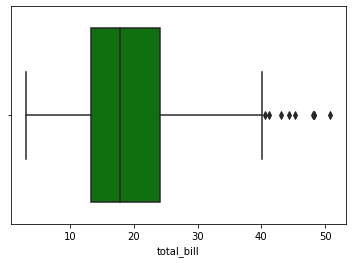

In [56]:
sns.boxplot(x = 'total_bill' , data = tips , color = 'green')
plt.show()

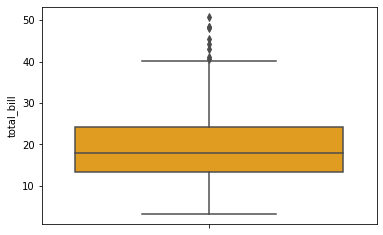

In [54]:
sns.boxplot( y = 'total_bill'  , data = tips , color ='orange')
plt.show()

######  Insights :
        1) Average bill at weekend is more that weekdays
        2) over weekend , people prefer Sunday more than Sat

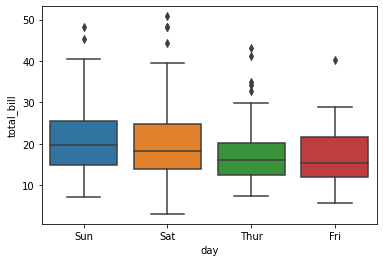

In [64]:
sns.boxplot( data = tips, x ='day' , y = 'total_bill')
plt.show()

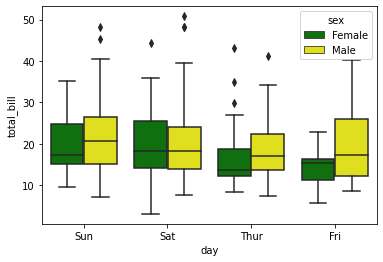

In [63]:
sns.boxplot( x ='day' , y = 'total_bill' , hue = 'sex' ,data = tips ,
            palette=['green','yellow'] )
plt.show()

## Heatmap
        1) used to present correlation matrix of the data
        2) correlation matrix always hold good for continuous variables

In [65]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

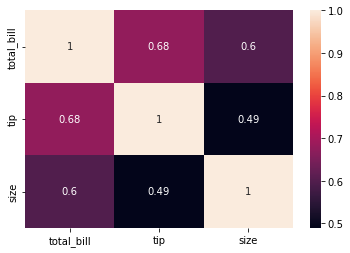

In [66]:
sns.heatmap(tips.corr() , annot=True)

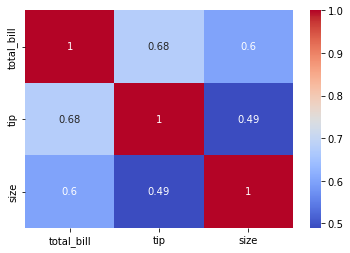

In [74]:
sns.heatmap(tips.corr() , annot=True , cmap ='coolwarm') 
plt.show()

In [76]:
tips[['total_bill','size']].corr()

,total_bill,size
total_bill,1.000000,0.598315
size,0.598315,1.000000


## Pairplot
        will plot pairwise realtionship across entire continuous variables at a time 
        but do support categorical variables in hue

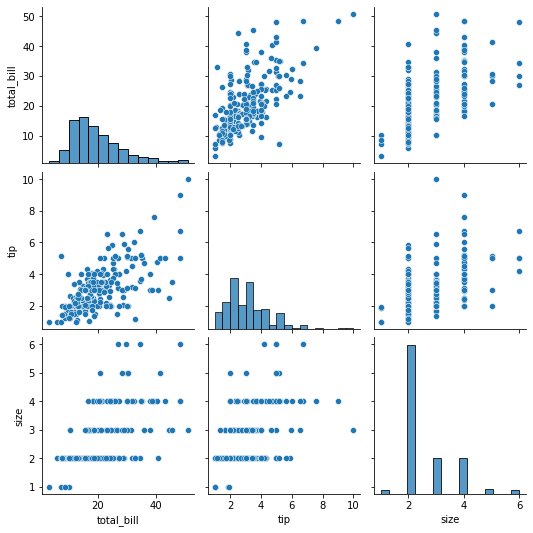

In [80]:
sns.pairplot(tips)
plt.show()

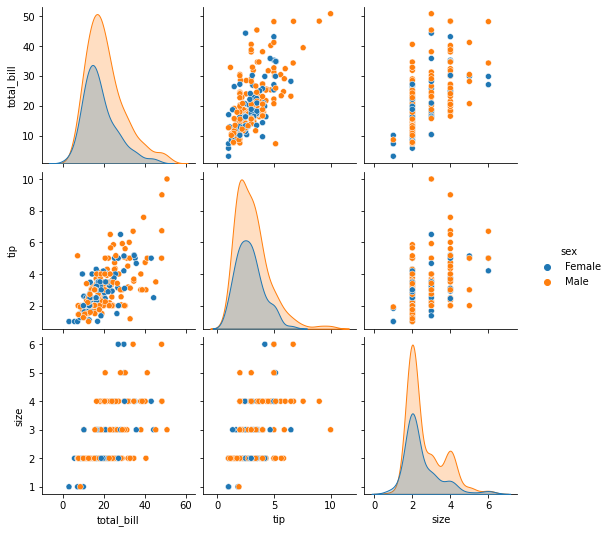

In [84]:
sns.pairplot(tips , hue = 'sex')
plt.savefig('pairplot.pdf')

## distplot & displot

<Figure size 72x216 with 0 Axes>

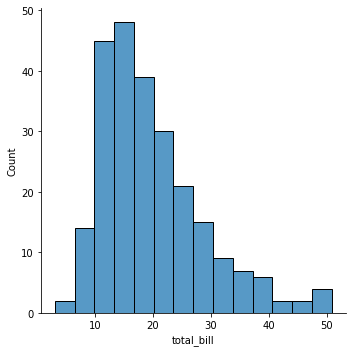

In [88]:
plt.figure(figsize=(1,3))
sns.displot(tips['total_bill'])
plt.show()

C:\Users\roopagupta\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

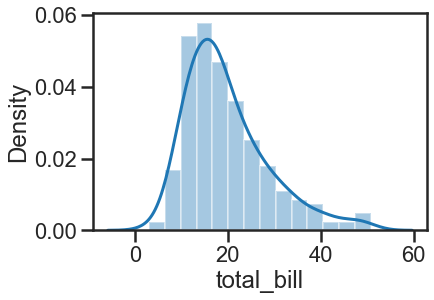

In [99]:
sns.distplot(tips['total_bill'])

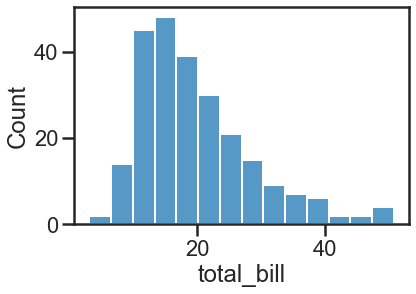

In [101]:
sns.histplot(tips['total_bill'])
plt.show()

## style and color of the graph 

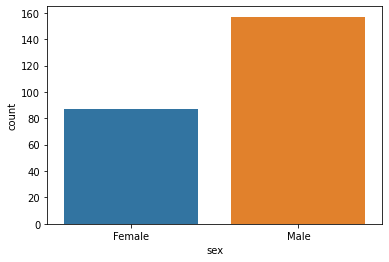

In [92]:
sns.countplot(x = 'sex' , data = tips)
plt.show()

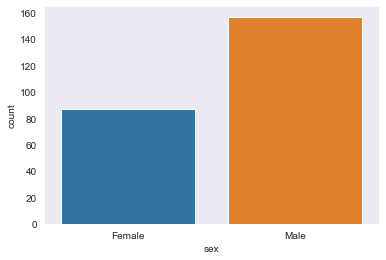

In [93]:
sns.set_style('dark')
sns.countplot(x = 'sex' , data = tips)
plt.show()

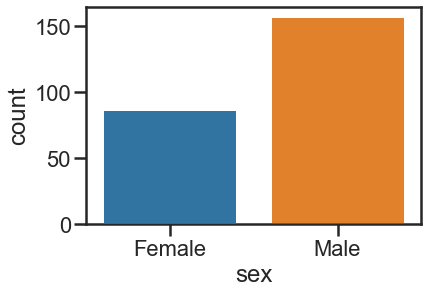

In [98]:
sns.set_style('ticks')
sns.countplot(x = 'sex' , data = tips)

plt.show()

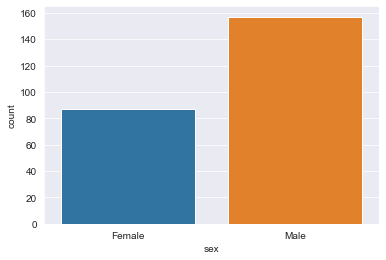

In [96]:
sns.set_style('darkgrid')
sns.countplot(x = 'sex' , data = tips)
plt.show()

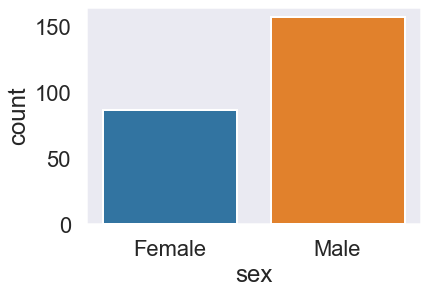

In [97]:
sns.set_context('poster' , font_scale= 1)
sns.set_style('dark')
sns.countplot(x = 'sex' , data = tips)
plt.show()